In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# 魔法指令, 可以直接在notebook显示图片
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置正常显示符号
plt.rcParams['axes.unicode_minus'] = False

主要分析:城市, 省份, 国家

# 一.读取数据

In [2]:
data = pd.read_csv(r'./data/starbucks.csv', encoding='utf-8')
data.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
Brand             25600 non-null object
Store Number      25600 non-null object
Store Name        25600 non-null object
Ownership Type    25600 non-null object
Street Address    25598 non-null object
City              25585 non-null object
State/Province    25600 non-null object
Country           25600 non-null object
Postcode          24078 non-null object
Phone Number      18739 non-null object
Timezone          25600 non-null object
Longitude         25599 non-null float64
Latitude          25599 non-null float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


# 二.数据清洗

## 1.缺失值处理

In [4]:
data.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [5]:
data[data['City'].isnull() == True]

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
5069,Starbucks,31657-104436,سان ستيفانو,Licensed,طريق الكورنيش أبراج سان ستيفانو,NaN,ALX,EG,NaN,20120800287,GMT+2:00 Africa/Cairo,29.96,31.24
5088,Starbucks,32152-109504,النايل سيتى,Licensed,كورنيش النيل أبراج النايل سيتى,NaN,C,EG,NaN,20120800307,GMT+2:00 Africa/Cairo,31.23,30.07
5089,Starbucks,32314-115172,أسكندرية الصحراوى,Licensed,"الكيلو 28 طريق الاسكندرية الصحراوى, سيتى سنتر ...",NaN,C,EG,NaN,20185022214,GMT+2:00 Africa/Cairo,31.03,30.06
5090,Starbucks,31479-105246,مكرم عبيد,Licensed,"شارع مكرم عبيد, سيتى ستارز مول",NaN,C,EG,NaN,20120800332,GMT+2:00 Africa/Cairo,31.34,30.09
5091,Starbucks,31756-107161,سيتى ستارز 1,Licensed,"شارع عمر بن الخطاب, سيتى ستارز مول",NaN,C,EG,NaN,20120800350,GMT+2:00 Africa/Cairo,31.33,30.06
5092,Starbucks,1397-139244,سيتى ستارز 3,Licensed,"شارع عمر بن الخطاب, كارفور المعادى",NaN,C,EG,NaN,20120029885,GMT+2:00 Africa/Cairo,31.33,30.06
5093,Starbucks,32191-116645,معادى سيتى سنتر,Licensed,القطامية الطريق الدائرى,NaN,C,EG,NaN,20185002677,GMT+2:00 Africa/Cairo,31.30,29.99
5094,Starbucks,3664-142484,سليمان أباظة,Licensed,"34شارع سليمان أباظة المهندسين, تيفولى مول",NaN,C,EG,NaN,129007799,GMT+2:00 Africa/Cairo,31.20,30.06
5095,Starbucks,3562-131562,تيفولى,Licensed,"ألماظة ميدان الجوهر شارع أحمد فوزى, صالة السفر 1",NaN,C,EG,NaN,018-0819995,GMT+2:00 Africa/Cairo,31.34,30.08
5096,Starbucks,31646-106547,مطار القاهرة,Licensed,"صالة السفر 1- مطار القاهرة, فندق سنافير",NaN,C,EG,NaN,20120800335,GMT+2:00 Africa/Cairo,31.41,30.11


In [6]:
data['City'] = data['City'].fillna(data['State/Province'])
data[data['City'].isnull() == True]

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude


## 2.筛选星巴克的信息

In [7]:
data['Brand'].unique() # 查看品牌中的唯一值

array(['Starbucks', 'Teavana', 'Evolution Fresh', 'Coffee House Holdings'],
      dtype=object)

In [8]:
starbucks = data[data['Brand'] == 'Starbucks']
starbucks['Brand'].unique() # 查看品牌中的唯一值

array(['Starbucks'], dtype=object)

In [9]:
starbucks.to_csv(r'./starbucks.csv', encoding='utf-8', index=False)
'保存成功'

'保存成功'

# 三.分析数据

In [10]:
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


## 1.数据样本总体情况

In [11]:
starbucks.shape

(25249, 13)

In [12]:
starbucks['Country'].unique()

array(['AD', 'AE', 'AR', 'AT', 'AU', 'AW', 'AZ', 'BE', 'BG', 'BH', 'BN',
       'BO', 'BR', 'BS', 'CA', 'CH', 'CL', 'CN', 'CO', 'CR', 'CW', 'CY',
       'CZ', 'DE', 'DK', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HU',
       'ID', 'IE', 'IN', 'JO', 'JP', 'KH', 'KR', 'KW', 'KZ', 'LB', 'LU',
       'MA', 'MC', 'MX', 'MY', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH',
       'PL', 'PR', 'PT', 'QA', 'RO', 'RU', 'SA', 'SE', 'SG', 'SK', 'SV',
       'TH', 'TR', 'TT', 'TW', 'US', 'VN', 'ZA'], dtype=object)

In [13]:
'共 ' + str(len(starbucks['Country'].unique())) + ' 个国家'

'共 73 个国家'

In [14]:
'共 ' + str(len(starbucks['City'].unique())) + ' 个城市'

'共 5406 个城市'

## 2.星巴克全球分布情况

# 1) 分布最多的前十名国家

In [15]:
country_top = starbucks['Country'].value_counts()[:10]
country_top

US    13311
CN     2734
CA     1415
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Country, dtype: int64

#### 使用柱形图显示

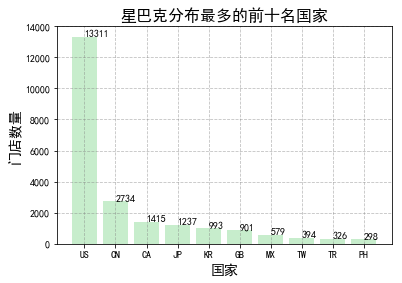

In [16]:
plt.bar(country_top.index, country_top, color='#c7edcc')
plt.title('星巴克分布最多的前十名国家', fontsize=16)
plt.xlabel('国家', fontsize=14)
plt.ylabel('门店数量', fontsize=14)
for i,j in zip(range(len(country_top)), country_top):
    plt.grid(which='major', color='gray', linestyle='--', alpha=0.5) # 显示网格
    plt.text(i, j, j) # 显示数据标签
plt.show()

# 2) 分布最多的前十名城市

In [17]:
city_top = starbucks['City'].value_counts()[:10]
city_top

上海市            542
Seoul          243
北京市            234
New York       230
London         215
Toronto        186
Mexico City    180
Chicago        179
Las Vegas      153
Houston        151
Name: City, dtype: int64

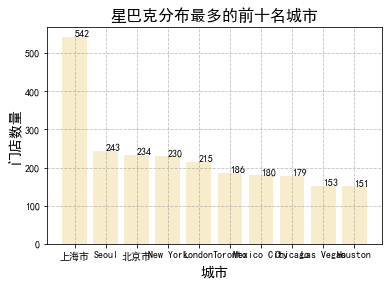

In [18]:
plt.bar(city_top.index, city_top, color='#f7edcc')
plt.title('星巴克分布最多的前十名城市', fontsize=16)
plt.xlabel('城市', fontsize=14)
plt.ylabel('门店数量', fontsize=14)
for i,j in zip(range(len(city_top)), city_top):
    plt.grid(which='major', color='gray', linestyle='--', alpha=0.5) # 显示网格
    plt.text(i, j, j) # 显示数据标签
plt.show()

# 3) 在中国分布情况